Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car

Price  -- Offer Price in EUROs	

Age_08_04 -- Age in months as in August 2004	

Mfg_Month -- Manufacturing month (1-12)	

Mfg_Year	-- Manufacturing Year

KM -- Accumulated Kilometers on odometer

Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)

HP -- Horse Power

Met_Color	 -- Metallic Color?  (Yes=1, No=0)

Color -- Color (Blue, Red, Grey, Silver, Black, etc.)

Automatic	-- Automatic ( (Yes=1, No=0)

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Cylinders	-- Number of cylinders

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms

Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)

BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)

Guarantee_Period -- 	Guarantee period in months

ABS -- Anti-Lock Brake System (Yes=1, No=0)

Airbag_1 -- Driver_Airbag  (Yes=1, No=0)

Airbag_2 -- Passenger Airbag  (Yes=1, No=0)

Airco -- Airconditioning  (Yes=1, No=0)

Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)

Boardcomputer -- Boardcomputer  (Yes=1, No=0)

CD_Player -- CD Player  (Yes=1, No=0)

Central_Lock -- Central Lock  (Yes=1, No=0)

Powered_Windows -- Powered Windows  (Yes=1, No=0)

Power_Steering -- Power Steering  (Yes=1, No=0)

Radio -- Radio  (Yes=1, No=0)

Mistlamps	-- Mistlamps  (Yes=1, No=0)

Sport_Model -- Sport Model  (Yes=1, No=0)

Backseat_Divider -- Backseat Divider  (Yes=1, No=0)

Metallic_Rim --Metallic Rim  (Yes=1, No=0)

Radio_cassette -- Radio Cassette  (Yes=1, No=0)

Tow_Bar -- Tow Bar  (Yes=1, No=0)



Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [1]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [56]:
import pandas as pd
TOYOTA=pd.read_csv('ToyotaCorolla.csv',encoding='unicode_escape')
TOYOTA.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [3]:
TOYOTA=TOYOTA[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [4]:
TOYOTA.head(3)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165


In [5]:
TOYOTA.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [6]:
TOYOTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [7]:
TOYOTA.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


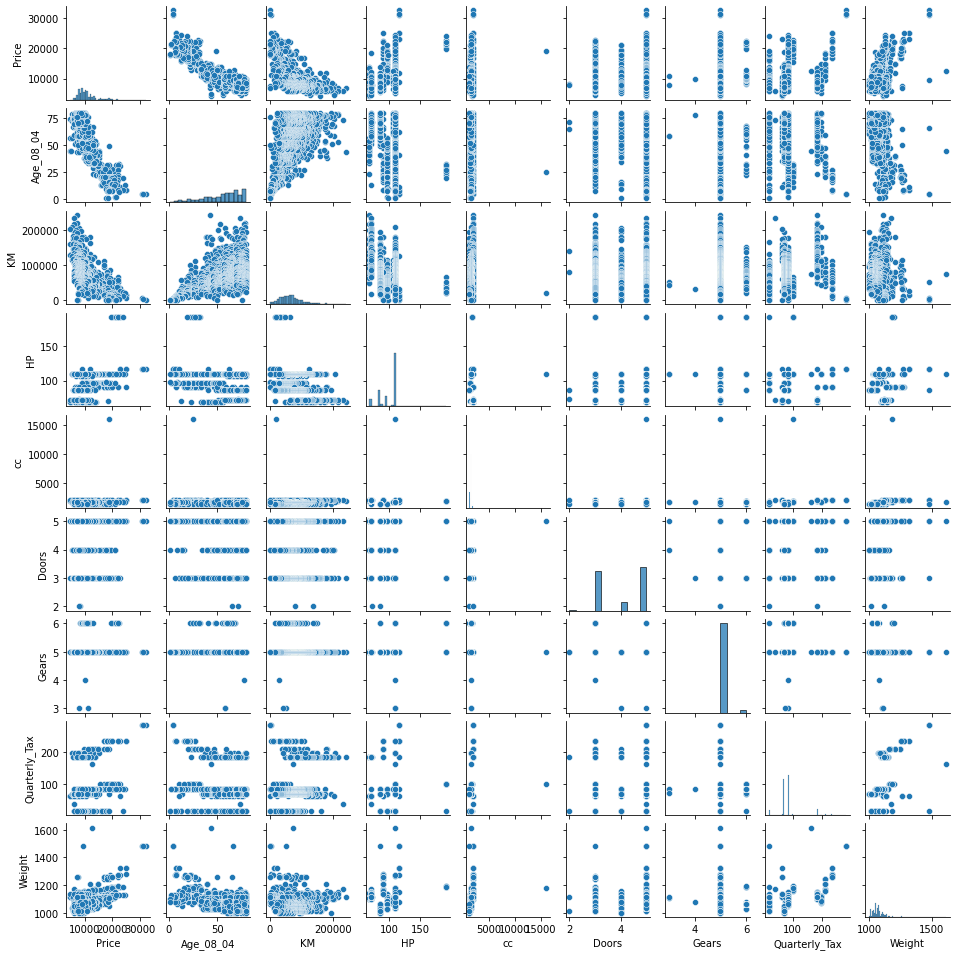

In [8]:
import seaborn as sns
sns.pairplot(TOYOTA,height=1.5)

In [9]:
import statsmodels.formula.api as smf
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=TOYOTA).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:33:10   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here R sqrd value is good which is 0.864 and cc,Doors probability value >0.05 

which shows it as not good parameter for prediction.let us check it by VIF.

In [10]:
model_cc=smf.ols('Price~cc',data=TOYOTA).fit()
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           1.55e-06
Time:                        15:33:10   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model_Doors=smf.ols('Price~Doors',data=TOYOTA).fit()
model_Doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           1.46e-12
Time:                        15:33:10   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model_cc_Doors=smf.ols('Price~cc+Doors',data=TOYOTA).fit()
model_cc_Doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           1.15e-15
Time:                        15:33:10   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From above 3 models its r sqrd value less but null hypothesis is rejecting by cc and Doors

'Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'

In [13]:
RSQ_Age=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=TOYOTA).fit().rsquared
VIF_Age=1/(1-RSQ_Age)
RSQ_KM=smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=TOYOTA).fit().rsquared
VIF_KM=1/(1-RSQ_KM)
RSQ_HP=smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=TOYOTA).fit().rsquared
VIF_HP=1/(1-RSQ_HP)
RSQ_cc=smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=TOYOTA).fit().rsquared
VIF_cc=1/(1-RSQ_cc)
RSQ_Doors=smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=TOYOTA).fit().rsquared
VIF_Doors=1/(1-RSQ_Doors)
RSQ_Gears=smf.ols('Gears~Age_08_04+KM+HP+Doors+Doors+Quarterly_Tax+Weight',data=TOYOTA).fit().rsquared
VIF_Gears=1/(1-RSQ_Gears)
RSQ_Tax=smf.ols('Quarterly_Tax~Age_08_04+KM+HP+Doors+Gears+Gears+Weight',data=TOYOTA).fit().rsquared
VIF_Tax=1/(1-RSQ_Tax)
RSQ_Weight=smf.ols('Weight~Age_08_04+KM+HP+Doors+Gears+Gears+Quarterly_Tax',data=TOYOTA).fit().rsquared
VIF_Weight=1/(1-RSQ_Weight)
Data_vif=pd.DataFrame({'Data':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],
                       'VIF':[VIF_Age,VIF_KM,VIF_HP,VIF_cc,VIF_Doors,VIF_Gears,VIF_Tax,VIF_Weight]})

Data_vif                      
                      

,Data,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098480
6,Quarterly_Tax,2.277342
7,Weight,2.452657


In [14]:
TOYOTA['Doors'].head()

0    3
1    3
2    3
3    3
4    3
Name: Doors, dtype: int64

In [15]:
TOYOTA['cc'].head()

0    2000
1    2000
2    2000
3    2000
4    2000
Name: cc, dtype: int64

Q-Q PLOT

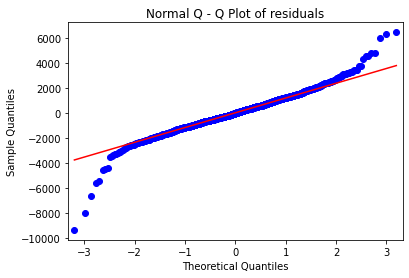

In [16]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q - Q Plot of residuals")
plt.show()

In [17]:
import numpy as np
list(np.where(model.resid>500))

[array([   7,    8,   13,   14,   15,   16,   17,   18,   19,   20,   22,
          23,   26,   28,   29,   32,   35,   38,   41,   45,   46,   47,
          49,   51,   52,   53,   58,   62,   63,   64,   65,   66,   68,
          70,   72,   74,   76,   77,   78,   80,   81,   83,   84,   85,
          89,   90,   91,   94,   98,   99,  100,  102,  106,  108,  109,
         110,  111,  112,  113,  114,  115,  116,  118,  119,  120,  121,
         123,  125,  128,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  153,  154,  156,  157,  158,  159,
         160,  161,  162,  163,  165,  166,  167,  168,  171,  172,  173,
         174,  175,  177,  178,  179,  182,  183,  190,  194,  196,  204,
         210,  223,  230,  237,  238,  253,  262,  276,  278,  279,  294,
         302,  304,  307,  311,  342,  345,  354,  357,  359,  398,  399,
         403,  409,  413,  423,  426,  427,  429,  430,  431,  439,  440,
         443,  446,  448,  452,  453, 

Let us go for homoscedacity and cook distances for further model Shaping

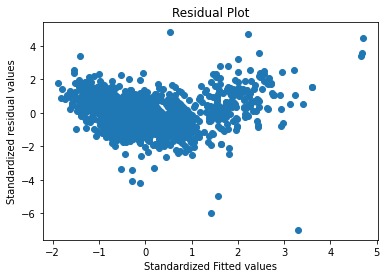

In [18]:
def get_standardized_values(values):
  return(values-values.mean())/values.std()

plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

RESIDUAL VS REGRESSORS

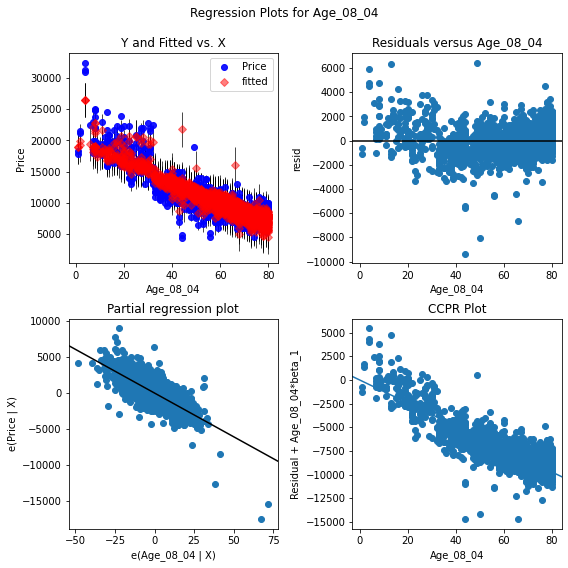

In [19]:
#'Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'
fig=plt.figure(figsize=(8,8))
fig=sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)
plt.show()

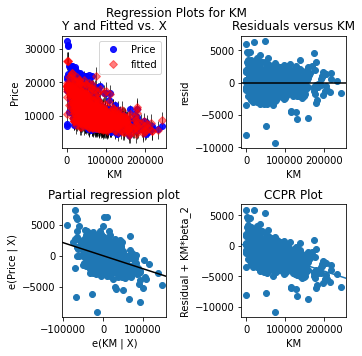

In [20]:
fig=plt.figure(figsize=(5,5))
fig=sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

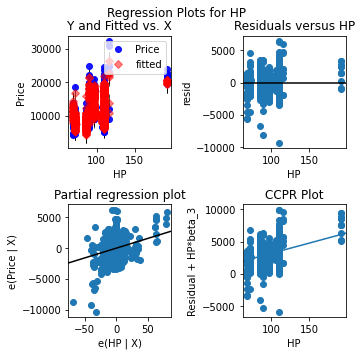

In [21]:
fig=plt.figure(figsize=(5,5))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

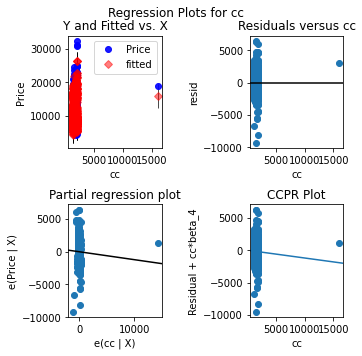

In [22]:
fig=plt.figure(figsize=(5,5))
fig=sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

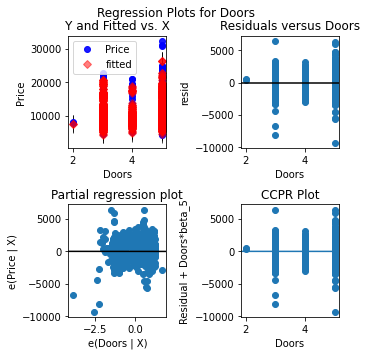

In [23]:
fig=plt.figure(figsize=(5,5))
fig=sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

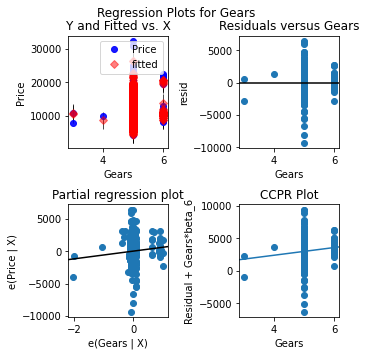

In [24]:
fig=plt.figure(figsize=(5,5))
fig=sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

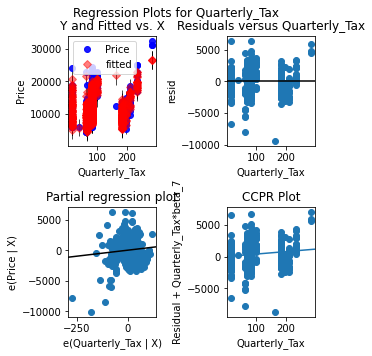

In [25]:
fig=plt.figure(figsize=(5,5))
fig=sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)
plt.show()

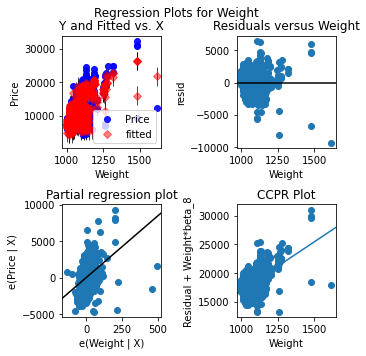

In [26]:
fig=plt.figure(figsize=(5,5))
fig=sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

From above Pairplot we can conclude that for Door data set pairplot not showning 
any noticable slop.So Door is not a good factor for predicting.And cc not accepting alternating hypothesis that mean its probability above 0.05.So we can ignore cc And Doors data

In [27]:
model_final=smf.ols('Price~Age_08_04+KM+HP+Gears+cc+Quarterly_Tax+Weight',data=TOYOTA).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:33:17   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5575.1401   1409.999     -3.954      0.000   -8341.032   -2809.248
Age_08_04      -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM               -0.0208      0.001    -16.636      0.000      -0.023      -0.018
HP               31.6728      2.810     11.270      0.000      26.160      37.186
Gears           595.8324    193.400      3.081      0.002     216.453     975.212
cc               -0.1210      0.090     -1.344      0.179      -0.298       0.056
Quarterly_Tax     3.9531      1.306      3.027      0.003       1.391       6.515
Weight           16.9478      1.033     16.401      0.000      14.921      18.975
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Finding Influence points By cooks distance and regression plots

In [28]:
from statsmodels.graphics.regressionplots import influence_plot
Model_influence=model_final.get_influence()
(c,_)=Model_influence.cooks_distance


<ipython-input-29-6ec2393f5575>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(TOYOTA)),np.round(c,2))


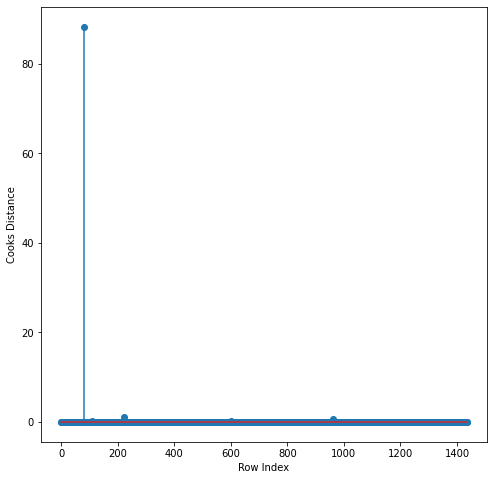

In [29]:
import numpy as np
fig=plt.subplots(figsize=(8,8))
plt.stem(np.arange(len(TOYOTA)),np.round(c,2))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
np.argmax(c),np.max(c)

(80, 88.25985710289673)

In [31]:
TOYOTA.shape

(1436, 9)

In [32]:
k=9
n=1436
leverage=3*(k+1)/n
leverage

0.020891364902506964

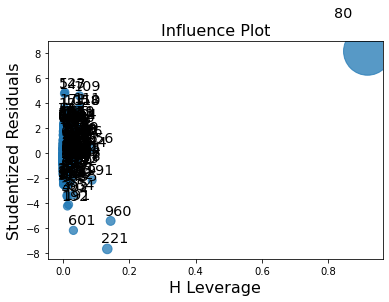

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_final)
plt.show()

In [34]:
TOYOTA=TOYOTA.drop(TOYOTA.index[80],axis=0)
TOYOTA

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [35]:
model_final=smf.ols('Price~Age_08_04+KM+HP+Gears+cc+Quarterly_Tax+Weight',data=TOYOTA).fit()
model_final.summary()
from statsmodels.graphics.regressionplots import influence_plot
Model_influence=model_final.get_influence()
(c,_)=Model_influence.cooks_distance





<ipython-input-36-6ec2393f5575>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(TOYOTA)),np.round(c,2))


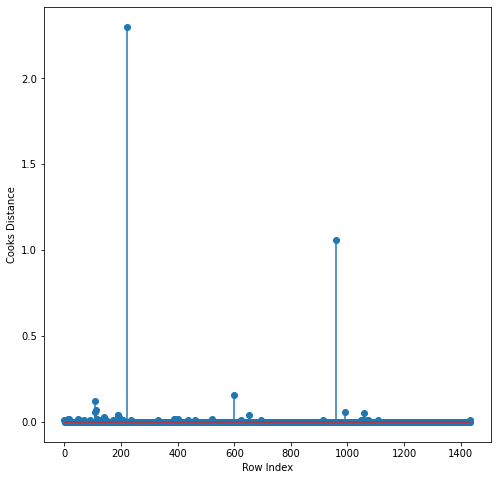

In [36]:
import numpy as np
fig=plt.subplots(figsize=(8,8))
plt.stem(np.arange(len(TOYOTA)),np.round(c,2))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [37]:
np.argmax(c),np.max(c)

(220, 2.3034451664541002)

In [38]:
TOYOTA.shape

(1435, 9)

In [39]:
k=9
n=1435
leverage=3*(k+1)/n
leverage

0.020905923344947737

In [40]:
TOYOTA=TOYOTA.drop(TOYOTA.index[220],axis=0)


In [41]:
model_final=smf.ols('Price~Age_08_04+KM+HP+Gears+cc+Quarterly_Tax+Weight',data=TOYOTA).fit()
model_final.summary()
from statsmodels.graphics.regressionplots import influence_plot
Model_influence=model_final.get_influence()
(c,_)=Model_influence.cooks_distance

<ipython-input-42-6ec2393f5575>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(TOYOTA)),np.round(c,2))


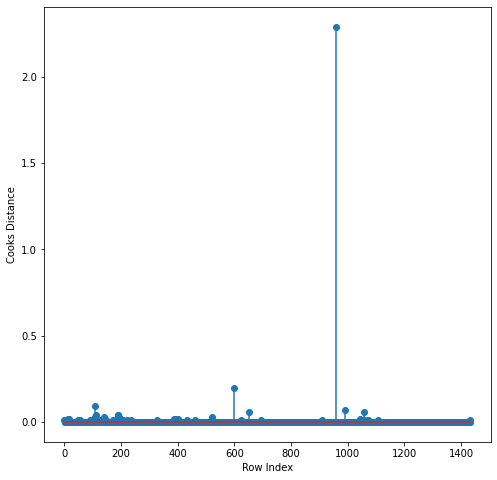

In [42]:
import numpy as np
fig=plt.subplots(figsize=(8,8))
plt.stem(np.arange(len(TOYOTA)),np.round(c,2))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
np.argmax(c),np.max(c)

(958, 2.290715916304203)

In [44]:
TOYOTA.shape

(1434, 9)

In [45]:
k=TOYOTA.shape[1]
n=TOYOTA.shape[0]
leverage=3*(k+1)/n
leverage

0.02092050209205021

In [46]:
TOYOTA=TOYOTA.drop(TOYOTA.index[958],axis=0)

In [47]:
model_final=smf.ols('Price~Age_08_04+KM+HP+Gears+cc+Quarterly_Tax+Weight',data=TOYOTA).fit()
model_final.summary()
from statsmodels.graphics.regressionplots import influence_plot
Model_influence=model_final.get_influence()
(c,_)=Model_influence.cooks_distance

<ipython-input-48-6ec2393f5575>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(TOYOTA)),np.round(c,2))


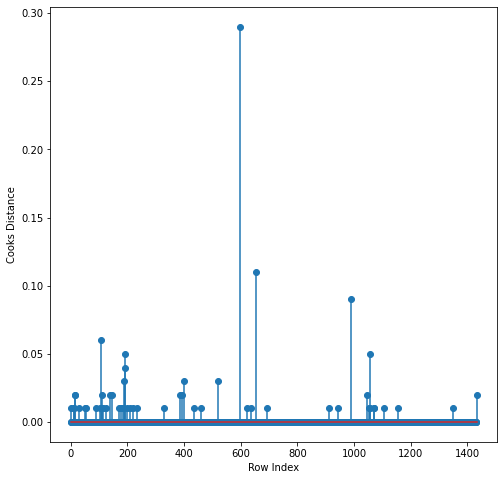

In [48]:
import numpy as np
fig=plt.subplots(figsize=(8,8))
plt.stem(np.arange(len(TOYOTA)),np.round(c,2))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

ALL Value less than 1 but still more point above leverage but we cant delete somany values as ouliers

So we need to accept these are the nature of our data

Modelprediction

In [54]:
NEW_DATA=pd.DataFrame({'Age_08_04':10,'KM':5000,'HP':85,'Gears':3,'cc':4,'Quarterly_Tax':250,'Weight':1500},index=[0])
NEW_DATA

,Age_08_04,KM,HP,Gears,cc,Quarterly_Tax,Weight
0,10,5000,85,3,4,250,1500


In [55]:
model_final.predict(NEW_DATA)

0    34399.791132
dtype: float64